Mouse Temperature Analysis

In [18]:
## import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
## load excel file
file_path = "Mouse_Data_Student.xlsx"
data = pd.ExcelFile(file_path)
print(data.sheet_names) 

['Fem Temp', 'Fem Act', 'Male Temp', 'Male Act']


Earnest Visualization

Analyze Data Over 24 Hours

In [20]:
# Load the 'Fem Temp' sheet into a DataFrame
fem_temp_data = data.parse('Fem Temp')

# Preview the first few rows of the data
print(fem_temp_data.head())

      f1     f2     f3     f4     f5     f6     f7     f8     f9    f10  \
0  37.11  37.91  36.85  38.20  37.54  37.04  37.41  36.35  37.47  37.99   
1  37.13  37.98  36.78  38.19  37.55  37.06  37.46  36.41  37.53  37.99   
2  37.19  37.98  36.76  38.14  37.55  37.09  37.56  36.50  37.53  37.96   
3  37.20  37.96  36.72  37.95  37.54  37.11  37.74  36.55  37.46  37.93   
4  37.22  37.95  36.64  37.80  37.53  37.09  37.73  36.63  37.51  37.87   

     f11    f12    f13  
0  38.02  36.32  36.54  
1  37.99  36.44  36.69  
2  37.86  36.52  36.75  
3  37.80  36.48  36.96  
4  37.76  36.30  37.01  


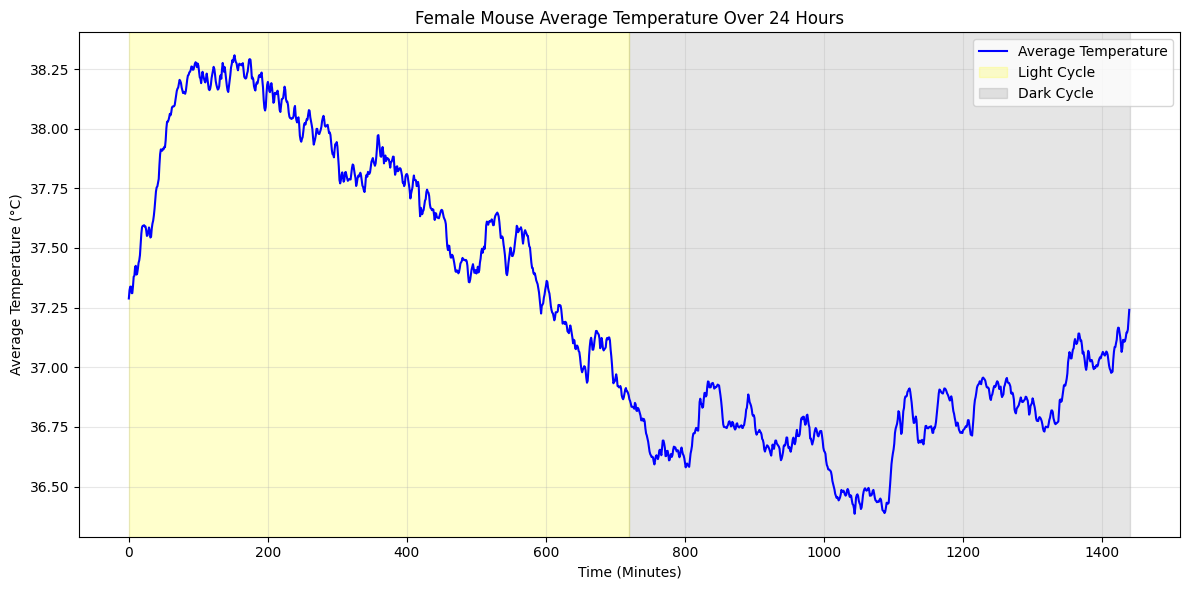

In [21]:
# Calculate the average temperature for each minute across all female mice
fem_temp_data['Average Temp'] = fem_temp_data.mean(axis=1)

# Extract the first 1440 rows (24 hours of data)
one_day_data = fem_temp_data['Average Temp'][:1440]

# Define light/dark cycle (12 hours light, 12 hours dark)
light_dark_cycle = np.array(['Light'] * 720 + ['Dark'] * 720)

# Plot temperature over 24 hours
plt.figure(figsize=(12, 6))
plt.plot(one_day_data, label='Average Temperature', color='blue')
plt.axvspan(0, 720, color='yellow', alpha=0.2, label='Light Cycle')
plt.axvspan(720, 1440, color='black', alpha=0.1, label='Dark Cycle')

# Customize the plot
plt.title('Female Mouse Average Temperature Over 24 Hours')
plt.xlabel('Time (Minutes)')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

Compare average temperature patterns between male and female mice over the 24-hour cycle

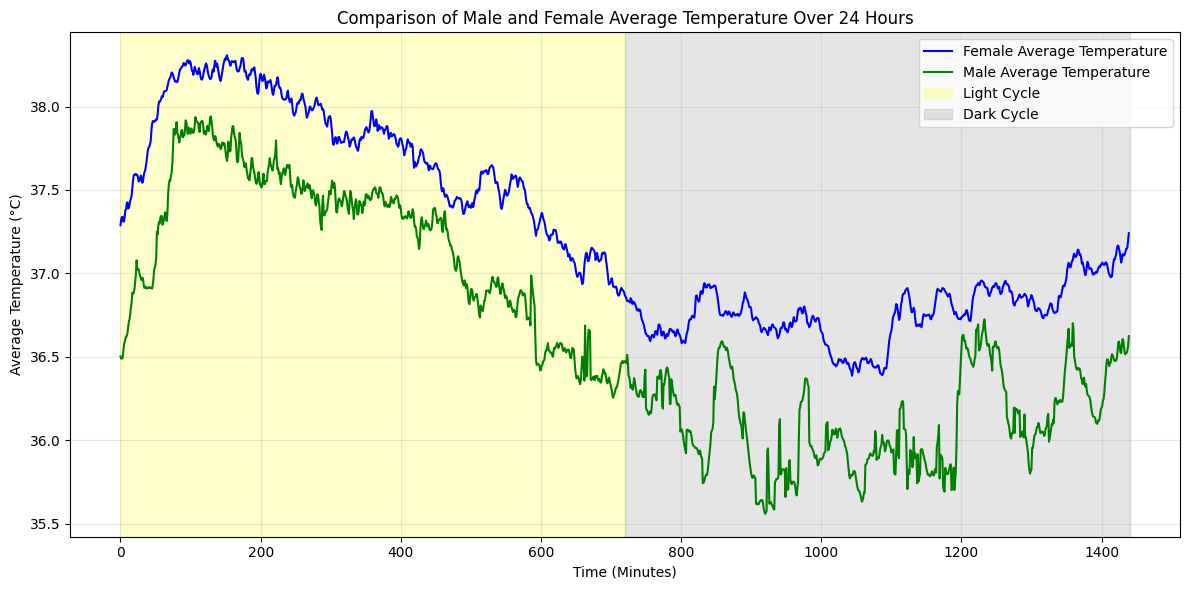

In [22]:
# Load the 'Male Temp' sheet into a DataFrame
male_temp_data = data.parse('Male Temp')

# Calculate the average temperature for each minute across all male mice
male_temp_data['Average Temp'] = male_temp_data.mean(axis=1)

# Extract the first 1440 rows (24 hours of data) for both males and females
female_one_day_data = fem_temp_data['Average Temp'][:1440]
male_one_day_data = male_temp_data['Average Temp'][:1440]

# Plot temperature patterns for male and female mice over 24 hours
plt.figure(figsize=(12, 6))
plt.plot(female_one_day_data, label='Female Average Temperature', color='blue')
plt.plot(male_one_day_data, label='Male Average Temperature', color='green')
plt.axvspan(0, 720, color='yellow', alpha=0.2, label='Light Cycle')
plt.axvspan(720, 1440, color='black', alpha=0.1, label='Dark Cycle')

# Customize the plot
plt.title('Comparison of Male and Female Average Temperature Over 24 Hours')
plt.xlabel('Time (Minutes)')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


Deceptive Visualizations

Tempeature Divergence During Light Vs. Dark Periods

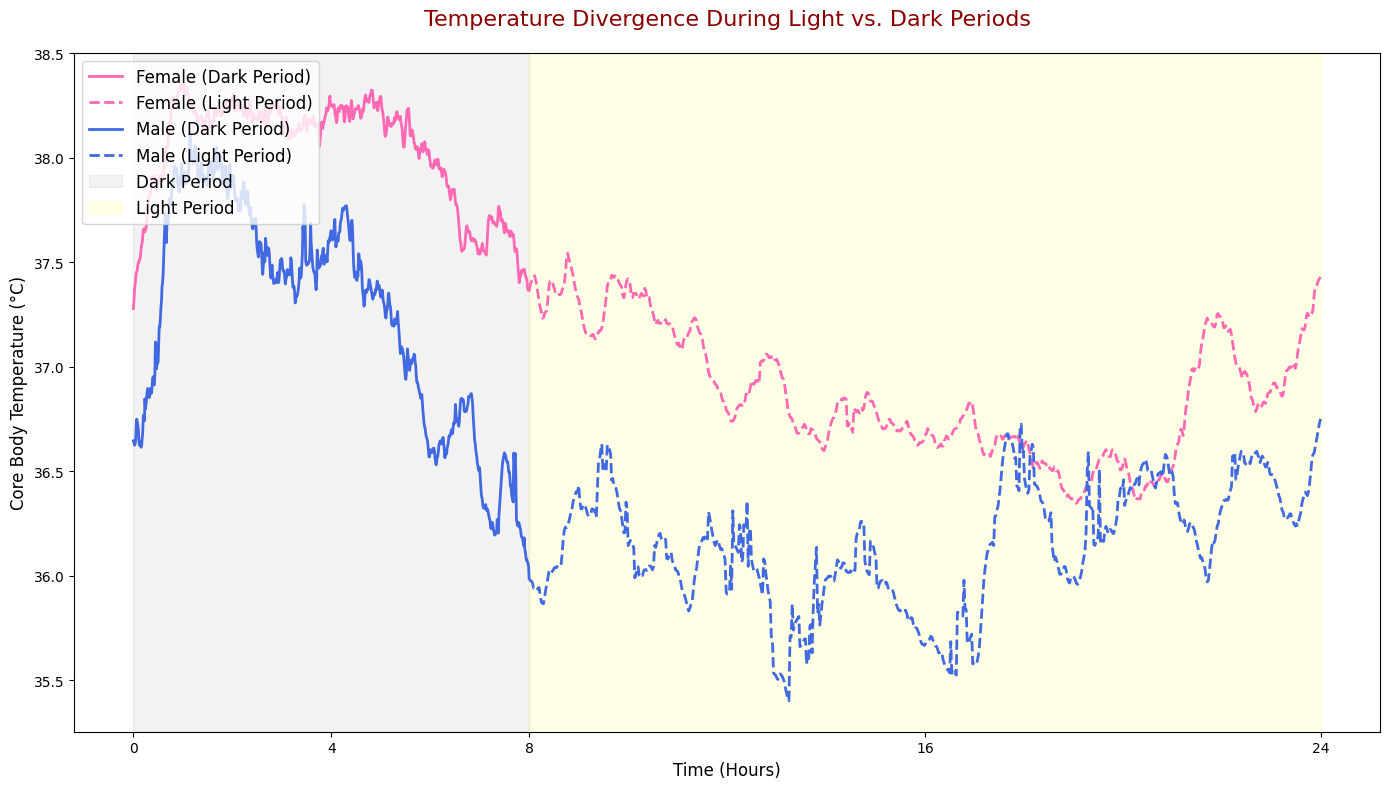

In [28]:
plt.figure(figsize=(14, 8))

# Extract temperature data for 24 hours (estrus day for females)
female_estrus = fem_temp_data['Average Temp'][1440:2880].reset_index(drop=True)
male_same_period = male_temp_data['Average Temp'][1440:2880].reset_index(drop=True)

# Define a misleading x-axis to distort light/dark periods
misleading_x = np.concatenate([np.linspace(0, 8, 720), np.linspace(8, 24, 720)])

# Plot the data
plt.plot(misleading_x[:720], female_estrus[:720], label='Female (Dark Period)', color='#FF69B4', linewidth=2)
plt.plot(misleading_x[720:], female_estrus[720:], label='Female (Light Period)', color='#FF69B4', linewidth=2, linestyle='--')
plt.plot(misleading_x[:720], male_same_period[:720], label='Male (Dark Period)', color='#4169E1', linewidth=2)
plt.plot(misleading_x[720:], male_same_period[720:], label='Male (Light Period)', color='#4169E1', linewidth=2, linestyle='--')

# Shading to emphasize periods
plt.axvspan(0, 8, color='gray', alpha=0.1, label='Dark Period')
plt.axvspan(8, 24, color='yellow', alpha=0.1, label='Light Period')

# Add title and labels
plt.title('Temperature Divergence During Light vs. Dark Periods', fontsize=16, pad=20, color='darkred')
plt.xlabel('Time (Hours)', fontsize=12)
plt.ylabel('Core Body Temperature (°C)', fontsize=12)

# Adjust axis ticks to exaggerate the distortion
plt.xticks([0, 4, 8, 16, 24], labels=['0', '4', '8', '16', '24'], fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Mouse Tempeature Patterns Over 24 Hours

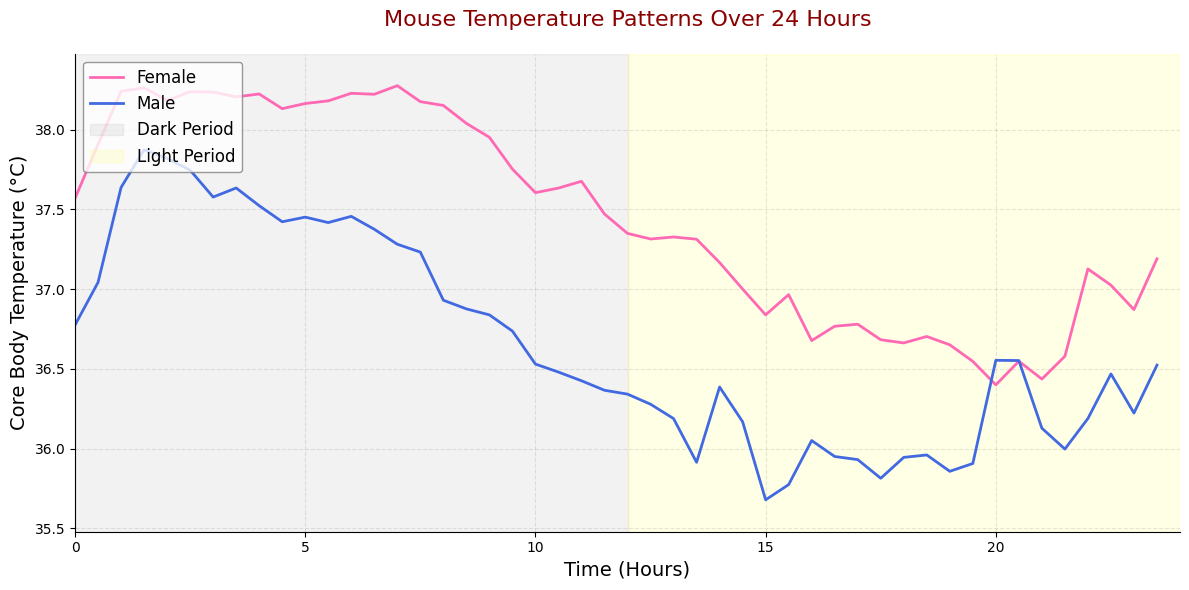

In [50]:
# Create figure
plt.figure(figsize=(12, 6), facecolor='white')  # Compact figure size

# Plot the data with smooth lines
plt.plot(hours, female_means, label='Female', color='#FF69B4', linewidth=2)
plt.plot(hours, male_means, label='Male', color='#4169E1', linewidth=2)

# Add light/dark cycle shading for context
plt.axvspan(0, 12, color='gray', alpha=0.1, label='Dark Period')  # First 12 hours
plt.axvspan(12, 24, color='yellow', alpha=0.1, label='Light Period')  # Last 12 hours

# Dynamically adjust y-axis limits to fit the data
y_min = min(female_means + male_means) - 0.2
y_max = max(female_means + male_means) + 0.2
plt.ylim(y_min, y_max)
plt.xlim(0, 24)

# Update title and axis labels
plt.title('Mouse Temperature Patterns Over 24 Hours', fontsize=16, pad=20, color='darkred')
plt.xlabel('Time (Hours)', fontsize=14)
plt.ylabel('Core Body Temperature (°C)', fontsize=14)

# Add a grid for readability
plt.grid(alpha=0.2, color='gray', linestyle='--')

# Update the legend
plt.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white', edgecolor='gray')

# Remove top and right spines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout to avoid overlaps
plt.tight_layout()

# Display the plot
plt.show()

